In [2]:
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline
from pylab import rcParams
from pandas import DataFrame
#import seaborn; seaborn.set()
rcParams['figure.figsize'] = 16,8
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from fastdtw import fastdtw
from operator import itemgetter
from scipy.stats import itemfreq
from scipy.cluster.hierarchy import dendrogram, linkage
import re
import scipy
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [3]:
series = pd.Series.from_csv('ibm_daily_1962-2018.csv', sep='\t',header=0)

In [4]:
series = series["1962-01-02":"2017-12-29"] # Rimuovo il 2018

In [5]:
groups = series.groupby(pd.Grouper(freq='M'))
months = []
monthly_series = []
monthly_list = []
for name, group in groups:
    months.append([(name.month),(name.year)]) # Lista contenente gli anni e i mesi
    monthly_series.append(pd.Series(group)) # Lista contenente serie pandas per ogni mese
    monthly_list.append(list(group.values)) # Lista contenente liste per ogni mese

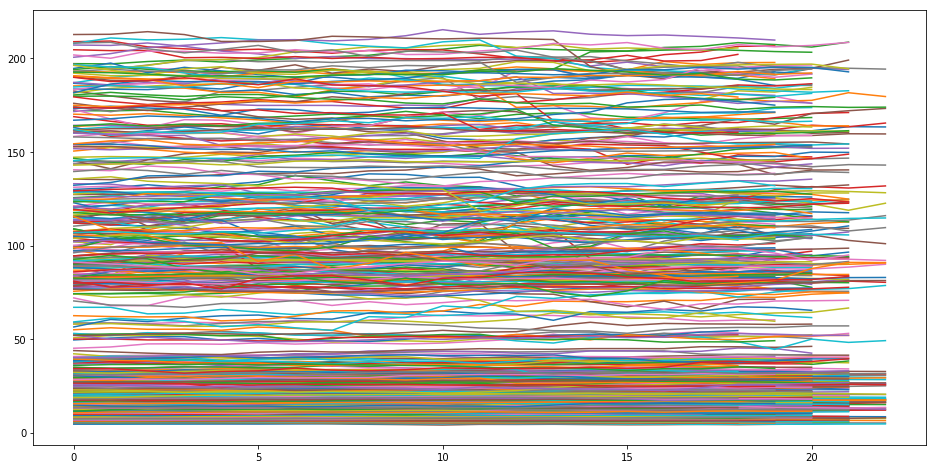

In [6]:
for i in range(len(monthly_list)):
    plt.plot(monthly_list[i])

In [6]:
groups = series.groupby(pd.Grouper(freq='M'))
monthly_list_norm = []
monthly_series_norm = pd.Series()
for name, group in groups:
    group_values = list(group.values)
    scaling_values = (group_values - mean(group_values))/std(group_values)
    monthly_list_norm.append(list(scaling_values))


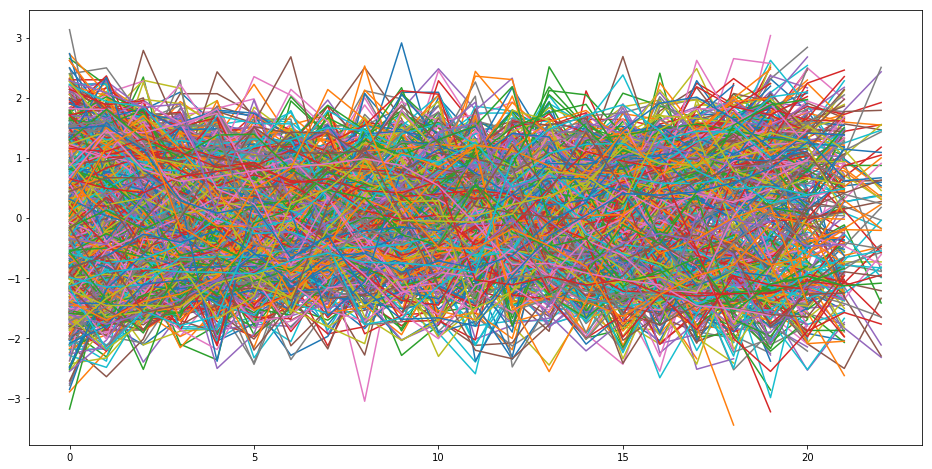

In [10]:
for i in range(len(monthly_list_norm)):
    plt.plot(monthly_list_norm[i])

#### Conversione per SAX (probabilmente non usiamo SAX)

In [54]:
input_str = open("input_str.txt",'w')


for j in range(len(monthly_list_norm)):
    string_series = ""
    print("@NAME={}-{}".format(months[j][1],months[j][0]), file = input_str)
    for i in range(len(monthly_list_norm[j])):
        if(i != len(monthly_list_norm[j])-1):
            string_series = string_series + str(monthly_list_norm[j][i]) + ","
        else:
            string_series = string_series + str(monthly_list_norm[j][i])
    print(string_series, file = input_str)

### Binning per ampiezza con Pandas

In [7]:
monthly_list_binned = []
for i in monthly_list_norm:
    binning = pd.cut(i, 13, labels = False)
    monthly_list_binned.append(list(binning))

In [110]:
'''
# Solo se si usa algoritmo gsp prof.
for i in range(len(monthly_list_binned)):
    for j in range(len(monthly_list_binned[i])):
        monthly_list_binned[i][j] = list(str(monthly_list_binned[i][j]))
monthly_list_binned
'''

In [9]:
# Conversione per SPMF

input_gsp = open("input_gsp.txt",'w')


for j in range(len(monthly_list_binned)):
    string_series = ""
    for i in range(len(monthly_list_binned[j])):
        if(i != len(monthly_list_binned[j])-1):
            string_series = string_series + str(monthly_list_binned[j][i]) + " -1 "
        else:
            string_series = string_series + str(monthly_list_binned[j][i]) + " -2"
    print(string_series, file = input_gsp)

In [204]:
# Binning per quantili (probabilmente sbagliato farlo)

monthly_list_binned_q = []
for i in range(len(monthly_list_norm)):
    binning = pd.qcut(monthly_list_norm[i], 13, labels = False, duplicates ='drop')
    monthly_list_binned_q.append(list(binning))

In [207]:
# Output Binning per quantili (probabilmente sbagliato farlo)

input_gsp_q = open("input_gsp_q.txt",'w')


for j in range(len(monthly_list_binned_q)):
    string_series = ""
    for i in range(len(monthly_list_binned_q[j])):
        if(i != len(monthly_list_binned_q[j])-1):
            string_series = string_series + str(monthly_list_binned_q[j][i]) + " -1 "
        else:
            string_series = string_series + str(monthly_list_binned_q[j][i]) + " -2"
    print(string_series, file = input_gsp_q)

In [143]:
f = open('output_gsp.txt', 'r')
x = f.readlines()
f.close()

In [144]:
x

['0 -1 #SUP: 672\n',
 '1 -1 #SUP: 551\n',
 '2 -1 #SUP: 562\n',
 '3 -1 #SUP: 569\n',
 '4 -1 #SUP: 557\n',
 '5 -1 #SUP: 541\n',
 '6 -1 #SUP: 551\n',
 '7 -1 #SUP: 567\n',
 '8 -1 #SUP: 568\n',
 '9 -1 #SUP: 672\n',
 '0 -1 0 -1 #SUP: 416\n',
 '0 -1 1 -1 #SUP: 403\n',
 '1 -1 0 -1 #SUP: 387\n',
 '0 -1 2 -1 #SUP: 401\n',
 '2 -1 0 -1 #SUP: 342\n',
 '0 -1 3 -1 #SUP: 392\n',
 '3 -1 0 -1 #SUP: 335\n',
 '0 -1 4 -1 #SUP: 367\n',
 '4 -1 0 -1 #SUP: 323\n',
 '0 -1 5 -1 #SUP: 348\n',
 '5 -1 0 -1 #SUP: 281\n',
 '0 -1 6 -1 #SUP: 341\n',
 '6 -1 0 -1 #SUP: 278\n',
 '0 -1 7 -1 #SUP: 324\n',
 '7 -1 0 -1 #SUP: 270\n',
 '0 -1 8 -1 #SUP: 311\n',
 '8 -1 0 -1 #SUP: 273\n',
 '0 -1 9 -1 #SUP: 340\n',
 '9 -1 0 -1 #SUP: 325\n',
 '1 -1 1 -1 #SUP: 334\n',
 '1 -1 2 -1 #SUP: 340\n',
 '2 -1 1 -1 #SUP: 331\n',
 '1 -1 3 -1 #SUP: 319\n',
 '3 -1 1 -1 #SUP: 308\n',
 '1 -1 4 -1 #SUP: 300\n',
 '4 -1 1 -1 #SUP: 278\n',
 '1 -1 5 -1 #SUP: 272\n',
 '5 -1 1 -1 #SUP: 244\n',
 '1 -1 6 -1 #SUP: 268\n',
 '6 -1 1 -1 #SUP: 240\n',
 '1 -1 7 -

In [157]:
m = re.search('(-*[0-9] +)', x[0])

In [186]:
p = re.compile(r'(-*[0-9] +)')
ciao=p.findall(x[0])

0

In [174]:
s = re.compile(r'#SUP: ([1-9]+)\n')
s.findall(x[0])

['672']

In [200]:
for i in range(len(x)):
    seq = []
    p = re.compile(r'(-*[0-9] +)')
    seq.append(p.findall(x[i]))
    s = re.compile(r'#SUP: ([1-9]+)\n')
    seq.append(s.findall(x[i]))
    for j in range(len(seq[0])):
        seq[0][j] = int(seq[0][j])
    for j in range(len(list(seq[0]))):
        if seq[0][j] == -1:
            seq[0].pop(j)
    print(seq[0])

    

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]


IndexError: list index out of range

In [176]:
seq

[['9 ', '-1 ', '9 ', '-1 ', '9 ', '-1 ', '8 ', '-1 ', '7 ', '-1 '], ['69']]

In [170]:
p

re.compile(r'(-*[0-9] +)', re.UNICODE)

#### Binning sulla serie completa invece che serie per serie

In [210]:
# Unisco le serie in un'unica lista
list_join = []
for i in range(len(monthly_list_norm)):
    for j in range(len(monthly_list_norm[i])):
        list_join.append(monthly_list_norm[i][j])

In [217]:
# Discretizzo

list_join_binned = list(pd.cut(list_join, 13, labels = False))

In [221]:
# Rifaccio le liste annuali

monthly_list_superbin = []
j = 0
month_length = 0
while(i < len(list_join_binned)):
    month = []
    month_length += len(monthly_list_norm[j])
    while(i < month_length):
        month.append(list_join_binned[i])
        i += 1
    monthly_list_superbin.append(month)
    j += 1


In [227]:
# Output

input_gsp_superbin = open("input_gsp_superbin.txt",'w')


for j in range(len(monthly_list_superbin)):
    string_series = ""
    for i in range(len(monthly_list_superbin[j])):
        if(i != len(monthly_list_superbin[j])-1):
            string_series = string_series + str(monthly_list_superbin[j][i]) + " -1 "
        else:
            string_series = string_series + str(monthly_list_superbin[j][i]) + " -2"
    print(string_series, file = input_gsp_superbin)